In [1]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from linearmodels.panel.data import PanelData
from linearmodels.panel import PanelOLS, PooledOLS, RandomEffects, compare
import matplotlib.pyplot as plt
from plot_result import plot_result

In [2]:
df=pd.read_csv("../../data/merged/len4_ndb_agg_DropNever.csv",encoding="shift-jis",index_col=0)

In [3]:
df=df.loc[df["総計"]>0]
df=df.loc[df["revenue"]>0]
df["log_quantity"]=np.log(df["総計"])
df["log_revenue"]=np.log(df["revenue"])
df_generic=df.copy()
df_branded=df.copy()
df_branded=df_branded.loc[df_branded["後発品区分"]==0]
df_generic=df_generic.loc[df_generic["後発品区分"]==1]
df_branded=df_branded.set_index(["id","year"])
df_generic=df_generic.set_index(["id","year"])
df=df.set_index(["id","year"])
df_branded=PanelData(df_branded,convert_dummies=False)
df_generic=PanelData(df_generic,convert_dummies=False)
df=PanelData(df,convert_dummies=False)

                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
elapsed_m7         -0.3903     0.1782    -2.1899     0.0291     -0.7406     -0.0400
elapsed_m6         -0.3658     0.1278    -2.8630     0.0044     -0.6170     -0.1147
elapsed_m5         -0.2027     0.0715    -2.8351     0.0048     -0.3432     -0.0622
elapsed_m4         -0.1361     0.0483    -2.8194     0.0050     -0.2310     -0.0412
elapsed_m3         -0.1230     0.0499    -2.4648     0.0141     -0.2210     -0.0249
elapsed_m2         -0.0607     0.0639    -0.9506     0.3423     -0.1862      0.0648
elapsed_0          -0.0941     0.1218    -0.7728     0.4401     -0.3335      0.1453
elapsed_1          -0.0302     0.0707    -0.4271     0.6695     -0.1693      0.1088
elapsed_2           0.0024     0.0915     0.0258     0.9795     -0.1775     

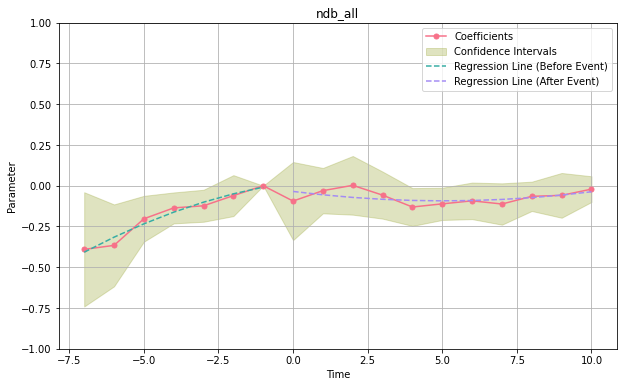

In [4]:
# all data
formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"


# add generic indicator
formula+="+後発品区分"

# add generic per
formula+="+generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"

mod_fe=PanelOLS.from_formula(formula, data=df,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_all",title="ndb_all",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_all",title="ndb_all")

                                Parameter Estimates                                
                 Parameter  Std. Err.     T-stat    P-value    Lower CI    Upper CI
-----------------------------------------------------------------------------------
generic_per         0.2638     0.0040     66.443     0.0000      0.2560      0.2716
elapsed_m7         -0.5659     0.3193    -1.7726     0.0780     -1.1958      0.0640
elapsed_m6         -0.4985     0.2131    -2.3394     0.0204     -0.9189     -0.0781
elapsed_m5         -0.3684     0.1002    -3.6776     0.0003     -0.5660     -0.1708
elapsed_m4         -0.2410     0.0773    -3.1191     0.0021     -0.3934     -0.0885
elapsed_m3         -0.1795     0.0720    -2.4922     0.0136     -0.3216     -0.0374
elapsed_m2         -0.1207     0.0922    -1.3094     0.1920     -0.3025      0.0612
elapsed_0          -0.1005     0.1643    -0.6120     0.5413     -0.4247      0.2236
elapsed_1           0.0949     0.1134     0.8365     0.4040     -0.1289     

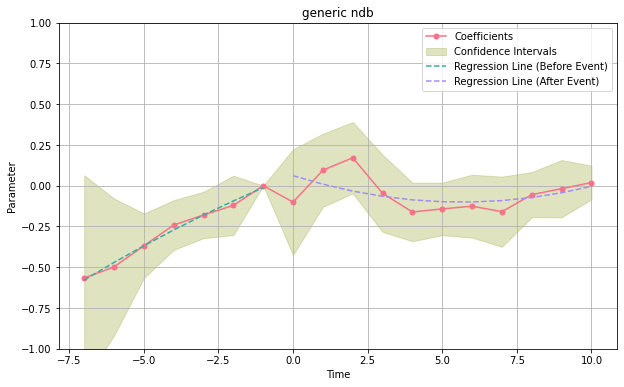

In [5]:
# generic data
formula="log_quantity~generic_per+elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"

# add generic_per
formula+="+generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"

mod_fe=PanelOLS.from_formula(formula, data=df_generic,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
# print(res_fe)
# plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_generic",title="generic ndb",start_from=2)

                          PanelOLS Estimation Summary                           
Dep. Variable:           log_quantity   R-squared:                        0.5592
Estimator:                   PanelOLS   R-squared (Between):             -0.1565
No. Observations:                 256   R-squared (Within):              -202.34
Date:                Mon, Sep 11 2023   R-squared (Overall):             -2.4861
Time:                        02:36:59   Log-likelihood                    219.61
Cov. Estimator:             Clustered                                           
                                        F-statistic:                      13.220
Entities:                          32   P-value                           0.0000
Avg Obs:                       8.0000   Distribution:                  F(19,198)
Min Obs:                       8.0000                                           
Max Obs:                       8.0000   F-statistic (robust):          1.126e+08
                            

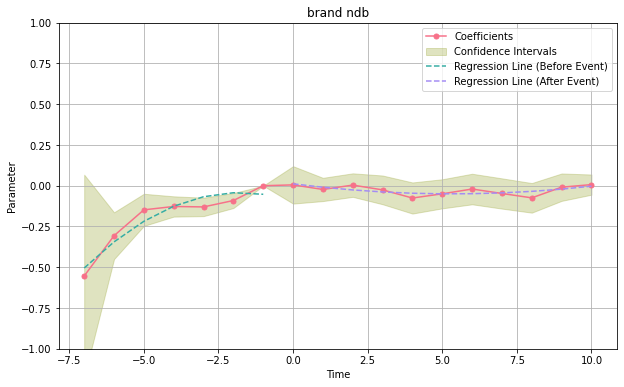

In [6]:
# branded data
formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+TimeEffects+EntityEffects"

# till elapsed_20
# formula="log_quantity~ elapsed_m7+elapsed_m6+elapsed_m5+elapsed_m4+elapsed_m3+elapsed_m2+elapsed_0+elapsed_1+elapsed_2+elapsed_3+elapsed_4+elapsed_5+elapsed_6+elapsed_7+elapsed_8+elapsed_9+elapsed_10+elapsed_11+elapsed_12+elapsed_13+elapsed_14+elapsed_15+TimeEffects+EntityEffects"
# add generic_per
formula+="+generic_per"
# generic_share_r
formula+=" + generic_share_r"
# generic_share_q
formula+=" + generic_share_q"


mod_fe=PanelOLS.from_formula(formula, data=df_branded,check_rank=False,drop_absorbed=True)
res_fe=mod_fe.fit(cov_type='clustered', cluster_entity=True)
# print(res_fe.summary.tables[1])
# print(res_fe.summary.tables[0])
print(res_fe)
# plot_result(res_fe,file_name="ndb_brand",title="brand ndb",start_from=1,period=15)
plot_result(res_fe,file_name="ndb_brand",title="brand ndb")
